In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from toolkit import filepath_to_csv, Orchids_filepath_to_csv

In [90]:
converions = pd.read_csv("round-2-island-data-bottle\prices_round_2_day_1.csv", sep = ';')

In [91]:
bottle_df = converions[converions.timestamp < 100000]
bottle_df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1
1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1
2,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1
3,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1
4,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1
...,...,...,...,...,...,...,...,...
995,99500,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1
996,99600,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1
997,99700,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1
998,99800,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1


<Axes: >

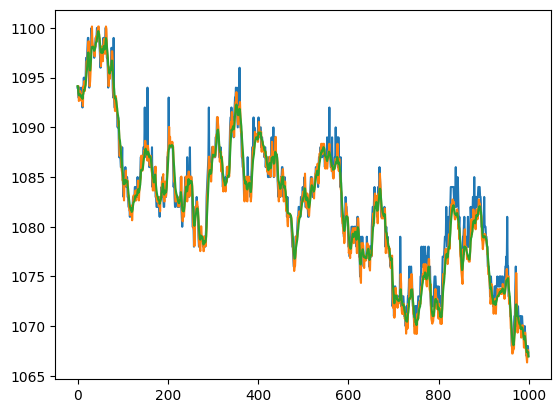

In [60]:
df = pd.read_csv(r"C:\Users\jiaha\Downloads\32063a92-a584-4d0e-ba75-2c3aa5e4925c.csv", sep=';')
df = df[df['product'] == 'ORCHIDS'].reset_index().drop(columns = ['index', 'day'])
df.bid_price_1.plot() # sell at this price
(bottle_df.ORCHIDS + bottle_df.TRANSPORT_FEES + bottle_df.IMPORT_TARIFF).shift(periods=1).plot() # buy at this price
(bottle_df.ORCHIDS + bottle_df.TRANSPORT_FEES + bottle_df.IMPORT_TARIFF).ewm(alpha=0.3).mean().plot()

In [85]:
prices = (bottle_df.ORCHIDS + bottle_df.TRANSPORT_FEES + bottle_df.IMPORT_TARIFF).astype(int)

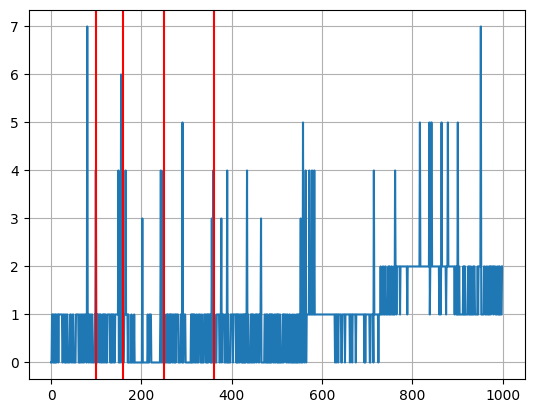

In [104]:
(df.bid_price_1 - prices).plot()
plt.grid(True)
plt.axvline(x=100, color='red')
plt.axvline(x=160, color='red')
plt.axvline(x=250, color='red')
plt.axvline(x=360, color='red')

In [100]:
a = (df.bid_price_1 - prices.shift(periods=0))
a[a > 1][:10]

80     7
99     4
149    4
155    6
165    4
202    3
243    4
249    4
291    5
356    3
dtype: int64

<Axes: >

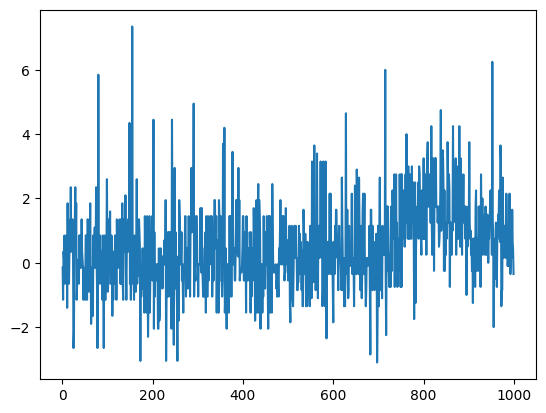

In [102]:
(df.bid_price_1 - (bottle_df.ORCHIDS + bottle_df.TRANSPORT_FEES + bottle_df.IMPORT_TARIFF).shift(periods=1)).plot()

<Axes: >

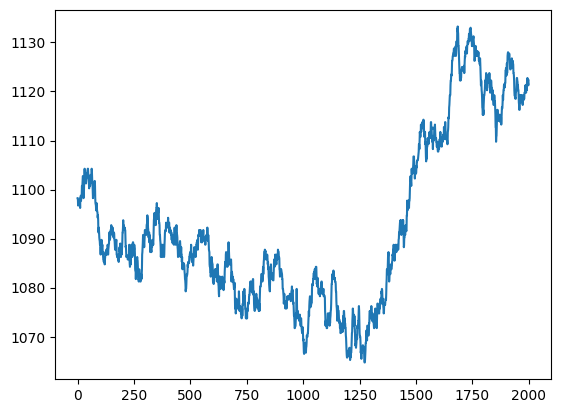

In [92]:
converions[converions.timestamp < 200000].ORCHIDS.plot()

In [30]:
def graph_values(df, column_name):
    # Assuming df is your DataFrame
    fig, ax = plt.subplots()  # Create a single plot

    # Plot ORCHIDS on primary y-axis (left)
    ax.plot(df['timestamp'], df['ORCHIDS'], label='ORCHIDS')
    ax.set_ylabel('ORCHID Values')

    # Right-hand y-axis ticks (for SUNLIGHT)
    ax2 = ax.twinx()
    ax2.tick_params(axis='y', labelleft=False)  # Hide left-side ticks for SUNLIGHT
    right_spine = ax2.spines['right']
    right_spine.set_position(('axes', 1.1))  # Adjust right spine position

    # Plot SUNLIGHT on secondary y-axis (right)
    ax2.plot(df['timestamp'], df[column_name], color='red', label=column_name)
    ax2.set_ylabel(column_name + ' Values', color='red')

    # Labels and legend
    plt.xlabel('Total Time')
    plt.title(column_name + 'and ORCHIDS vs. Total Time')
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    plt.tight_layout()
    plt.show()

<Axes: >

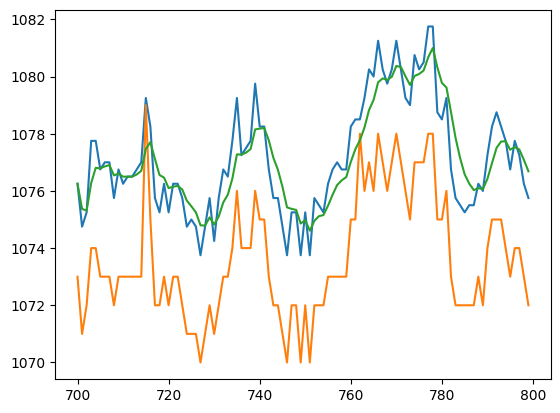

In [108]:
n = 700
bottle_df['ORCHIDS'].iloc[n:n + 100].plot()
df.bid_price_1.iloc[n:n + 100].plot()
bottle_df.ORCHIDS.iloc[n:n + 100].ewm(alpha=0.3).mean().plot()

<Axes: >

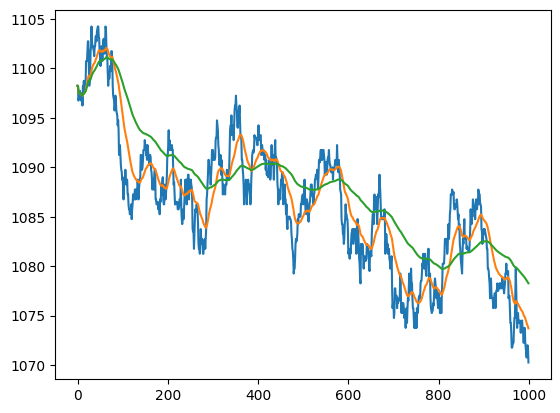

In [70]:
bottle_df['ORCHIDS'].plot()
bottle_df.ORCHIDS.ewm(alpha=0.05).mean().plot()
bottle_df.ORCHIDS.ewm(alpha=0.01).mean().plot()

In [111]:
sorted([1,3,4,5,1,3,4])

[1, 1, 3, 3, 4, 4, 5]